In [ ]:
 #1. Importing Necessary Libraries
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# 2. Loading the Dataset
df=pd.read_csv(r'titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
inputs.Age[0:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [24]:

## 3. Data Preprocessing
# Checking for missing values
inputs.Age=inputs.Age.fillna(inputs.Age.mean())
inputs.Age

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [25]:
# Selecting features and target variable
inputs=df.drop('Survived',axis='columns')
inputs

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [26]:
target=df['Survived']
target

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [8]:
# Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
le_Sex=LabelEncoder()
inputs['Sex_n']=le_Sex.fit_transform(inputs['Sex'])
inputs['Sex_n']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex_n, Length: 891, dtype: int64

In [9]:
inputs.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_n
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [10]:
x=inputs.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked','Sex'],axis='columns')
x

,Pclass,Age,Fare,Sex_n
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [11]:
y=target
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [ ]:
# 4. Splitting Data into Training and Testing Sets
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [13]:
len(X_train)

712

In [14]:
len(X_test)

179

In [15]:
## 6. Building the Model
model=tree.DecisionTreeClassifier()
model.fit(X_train,y_train)


DecisionTreeClassifier()

In [28]:
## 7. Making Predictions 1= Survived and 0= Not Survived
             # Pclass ,Age,Fare,Sex_n
model.predict([[3,22.0,7.2500,1]])


array([0])

In [18]:
             # Pclass ,Age,Fare,Sex_n
model.predict([[1,38.000000,71.2833,0]])

array([1])

In [22]:
#8.Evaluating the Model
model.score(X_test,y_test)

0.776536312849162

In [19]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
cm


array([[88, 16],
       [24, 51]])

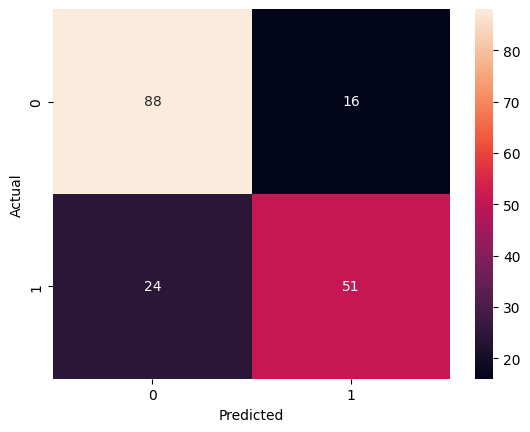

In [20]:
plt.Figure(figsize=(6,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()